<a href="https://colab.research.google.com/github/jackqk/sklearn-note/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regrresion**

# **Least-squares Liner Regression(ordinary least-squares linear regeression)**

linear model coeffient (w):[45.70870465]
linear model intercept (b):148.44575345658873
R-squared score (trainning):0.679
R-squared score (test):0.492


Text(0, 0.5, 'Target value (y)')

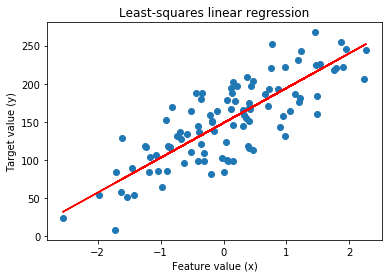

In [0]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X, y = make_regression(n_samples=100, n_features=1, n_informative=1, bias=150, noise=30, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

linreg = LinearRegression().fit(X_train, y_train)

print("linear model coeffient (w):{}".format(linreg.coef_))
print("linear model intercept (b):{}".format(linreg.intercept_))
print("R-squared score (trainning):{:.3f}".format(linreg.score(X_train, y_train)))
print("R-squared score (test):{:.3f}".format(linreg.score(X_test, y_test)))

plt.figure()
plt.scatter(X, y)
plt.plot(X, linreg.coef_*X + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)') 

# **Ridge Linear Regression**

### 准备数据

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

crime = pd.read_csv('https://raw.githubusercontent.com/jackqk/sklearn-note/master/data/CommViolPredUnnormalizedData.txt', sep=',', na_values='?')
columns_to_keep = [5,6] + list(range(11,26)) + list(range(32, 103))+[145]
crime = crime.iloc[:, columns_to_keep].dropna()

X_crime = crime.iloc[:, 0:88]
y_crime = crime['ViolentCrimesPerPop']
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state = 0)
print('Data prepared')

Data prepared


### Ridge Regression

In [0]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state = 0)
linridge = Ridge(alpha=20.0).fit(X_train, y_train)
print('ridge regression linear model intercept:{}'.format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))
print('R-squared score (training):{:.3f}'.format(linridge.score(X_train, y_train)))
print('R-squared score (test):{:.3f}'.format(linridge.score(X_test, y_test)))
print('Number of non-zero features:{}'.format(np.sum(linridge.coef_ != 0)))

ridge regression linear model intercept:-3352.423035846137
ridge regression linear model coeff:
[ 1.95091438e-03  2.19322667e+01  9.56286607e+00 -3.59178973e+01
  6.36465325e+00 -1.96885471e+01 -2.80715856e-03  1.66254486e+00
 -6.61426604e-03 -6.95450680e+00  1.71944731e+01 -5.62819154e+00
  8.83525114e+00  6.79085746e-01 -7.33614221e+00  6.70389803e-03
  9.78505502e-04  5.01202169e-03 -4.89870524e+00 -1.79270062e+01
  9.17572382e+00 -1.24454193e+00  1.21845360e+00  1.03233089e+01
 -3.78037278e+00 -3.73428973e+00  4.74595305e+00  8.42696855e+00
  3.09250005e+01  1.18644167e+01 -2.05183675e+00 -3.82210450e+01
  1.85081589e+01  1.52510829e+00 -2.20086608e+01  2.46283912e+00
  3.29328703e-01  4.02228467e+00 -1.12903533e+01 -4.69567413e-03
  4.27046505e+01 -1.22507167e-03  1.40795790e+00  9.35041855e-01
 -3.00464253e+00  1.12390514e+00 -1.82487653e+01 -1.54653407e+01
  2.41917002e+01 -1.32497562e+01 -4.20113118e-01 -3.59710660e+01
  1.29786751e+01 -2.80765995e+01  4.38513476e+01  3.8659004

### Ridge Regression with feature scale

In [0]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
linridge = Ridge(alpha=20).fit(X_train_scaled, y_train)
print('ridge regression linear model intercept:{}'.format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))
print('R-squared score (training):{:.3f}'.format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test):{:.3f}'.format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features:{}'.format(np.sum(linridge.coef_ != 0)))

ridge regression linear model intercept:933.3906385044153
ridge regression linear model coeff:
[  88.68827454   16.48947987  -50.30285445  -82.90507574  -65.89507244
   -2.27674244   87.74108514  150.94862182   18.8802613   -31.05554992
  -43.13536109 -189.44266328   -4.52658099  107.97866804  -76.53358414
    2.86032762   34.95230077   90.13523036   52.46428263  -62.10898424
  115.01780357    2.66942023    6.94331369   -5.66646499 -101.55269144
  -36.9087526    -8.7053343    29.11999068  171.25963057   99.36919476
   75.06611841  123.63522539   95.24316483 -330.61044265 -442.30179004
 -284.49744001 -258.37150609   17.66431072 -101.70717151  110.64762887
  523.13611718   24.8208959     4.86533322  -30.46775619   -3.51753937
   50.57947231   10.84840601   18.27680946   44.11189865   58.33588176
   67.08698975  -57.93524659  116.1446052    53.81163718   49.01607711
   -7.62262031   55.14288543  -52.08878272  123.39291017   77.12562171
   45.49795317  184.91229771  -91.35721203    1.07975

### select the best Ridge Regression

In [0]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

for this_alpha in [0, 1, 10,20, 50, 100, 1000]:
  linridge = Ridge(alpha=this_alpha).fit(X_train_scaled, y_train)
  r2_train = linridge.score(X_train_scaled, y_train)
  r2_test = linridge.score(X_test_scaled, y_test)
  num_coeff_bigger = sum(abs(linridge.coef_) > 1.0)
  print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, r-squared training: {:.2f}, r-squared test: {:.2f}'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Alpha = 0.00
num abs(coeff) > 1.0: 88, r-squared training: 0.67, r-squared test: -425283142331101020684288.00
Alpha = 1.00
num abs(coeff) > 1.0: 87, r-squared training: 0.66, r-squared test: 0.61
Alpha = 10.00
num abs(coeff) > 1.0: 87, r-squared training: 0.63, r-squared test: 0.63
Alpha = 20.00
num abs(coeff) > 1.0: 88, r-squared training: 0.61, r-squared test: 0.62
Alpha = 50.00
num abs(coeff) > 1.0: 86, r-squared training: 0.58, r-squared test: 0.59
Alpha = 100.00
num abs(coeff) > 1.0: 87, r-squared training: 0.55, r-squared test: 0.56
Alpha = 1000.00
num abs(coeff) > 1.0: 84, r-squared training: 0.31, r-squared test: 0.31


# **Lasso Regression**

### 数据准备

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

crime = pd.read_csv('https://raw.githubusercontent.com/jackqk/sklearn-note/master/data/CommViolPredUnnormalizedData.txt', sep=',', na_values='?')
columns_to_keep = [5,6] + list(range(11,26)) + list(range(32, 103))+[145]
crime = crime.iloc[:, columns_to_keep].dropna()

X_crime = crime.iloc[:, 0:88]
y_crime = crime['ViolentCrimesPerPop']
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state = 0)
print('Data prepared')

Data prepared


### 观察会有很多0

In [0]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)
print('Crime dataset')
print('lasso regression linear model intercept: {}'.format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'.format(linlasso.coef_))
print('Non-zero features: {}'.format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'.format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'.format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_crime), linlasso.coef_)), key = lambda e: -abs(e[1])):
  if e[1] != 0:
    print('\t{}, {:.3f}'.format(e[0], e[1]))

Crime dataset
lasso regression linear model intercept: 1186.612061998579
lasso regression linear model coeff:
[    0.             0.            -0.          -168.18346054
    -0.            -0.             0.           119.6938194
     0.            -0.             0.          -169.67564456
    -0.             0.            -0.             0.
     0.             0.            -0.            -0.
     0.            -0.             0.             0.
   -57.52991966    -0.            -0.             0.
   259.32889226    -0.             0.             0.
     0.            -0.         -1188.7396867     -0.
    -0.            -0.          -231.42347299     0.
  1488.36512229     0.            -0.            -0.
    -0.             0.             0.             0.
     0.             0.            -0.             0.
    20.14419415     0.             0.             0.
     0.             0.           339.04468804     0.
     0.           459.53799903    -0.             0.
   122.69221826    

In [0]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, r-squared test: {:.2f}'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 35, r-squared training: 0.65, r-squared test: 0.58
Alpha = 1.00
Features kept: 25, r-squared training: 0.64, r-squared test: 0.60
Alpha = 2.00
Features kept: 20, r-squared training: 0.63, r-squared test: 0.62
Alpha = 3.00
Features kept: 17, r-squared training: 0.62, r-squared test: 0.63
Alpha = 5.00
Features kept: 12, r-squared training: 0.60, r-squared test: 0.61
Alpha = 10.00
Features kept: 6, r-squared training: 0.57, r-squared test: 0.58
Alpha = 20.00
Features kept: 2, r-squared training: 0.51, r-squared test: 0.50
Alpha = 50.00
Features kept: 1, r-squared training: 0.31, r-squared test: 0.30


# **Polynomial Regression**

### 准备数据

In [0]:
from sklearn.datasets import make_friedman1
from sklearn.model_selection import train_test_split

X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1, random_state = 0)

### 以Least-squared Linear Regression为比较对象

In [0]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X_train, y_train)
print('linear model coeff (w): {}'.format(linreg.coef_))
print('linear model intercept (b): {:.3f}'.format(linreg.intercept_))
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

linear model coeff (w): [ 4.42036739  5.99661447  0.52894712 10.23751345  6.5507973  -2.02082636
 -0.32378811]
linear model intercept (b): 1.543
R-squared score (training): 0.722
R-squared score (test): 0.722


### Polynomial

In [0]:
from sklearn.preprocessing import PolynomialFeatures

print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1, random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) linear model coeff (w):\n{}'.format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'.format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'.format(linreg.score(X_test, y_test)))


Now we transform the original input data to add
polynomial features up to degree 2 (quadratic)

(poly deg 2) linear model coeff (w):
[ 3.40951018e-12  1.66452443e+01  2.67285381e+01 -2.21348316e+01
  1.24359227e+01  6.93086826e+00  1.04772675e+00  3.71352773e+00
 -1.33785505e+01 -5.73177185e+00  1.61813184e+00  3.66399592e+00
  5.04513181e+00 -1.45835979e+00  1.95156872e+00 -1.51297378e+01
  4.86762224e+00 -2.97084269e+00 -7.78370522e+00  5.14696078e+00
 -4.65479361e+00  1.84147395e+01 -2.22040650e+00  2.16572630e+00
 -1.27989481e+00  1.87946559e+00  1.52962716e-01  5.62073813e-01
 -8.91697516e-01 -2.18481128e+00  1.37595426e+00 -4.90336041e+00
 -2.23535458e+00  1.38268439e+00 -5.51908208e-01 -1.08795007e+00]
(poly deg 2) linear model intercept (b): -3.206
(poly deg 2) R-squared score (training): 0.969
(poly deg 2) R-squared score (test): 0.805



### Polynomial + Ridge

In [0]:
from sklearn.linear_model import Ridge

print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1, random_state = 0)
linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'.format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'.format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))


Addition of many polynomial features often leads to
overfitting, so we often use polynomial features in combination
with regression that has a regularization penalty, like ridge
regression.

(poly deg 2 + ridge) linear model coeff (w):
[ 0.          2.229281    4.73349734 -3.15432089  3.8585194   1.60970912
 -0.76967054 -0.14956002 -1.75215371  1.5970487   1.37080607  2.51598244
  2.71746523  0.48531538 -1.9356048  -1.62914955  1.51474518  0.88674141
  0.26141199  2.04931775 -1.93025705  3.61850966 -0.71788143  0.63173956
 -3.16429847  1.29161448  3.545085    1.73422041  0.94347654 -0.51207219
  1.70114448 -1.97949067  1.80687548 -0.2173863   2.87585898 -0.89423157]
(poly deg 2 + ridge) linear model intercept (b): 5.418
(poly deg 2 + ridge) R-squared score (training): 0.826
(poly deg 2 + ridge) R-squared score (test): 0.825
